* importing modules

In [ ]:
from scripts import py_functions
import numpy as np
import pandas as pd
import json
import os

In [10]:
import numpy as np
import pandas as pd
import json
import os

# Reading information from json file. Used to extract the parameters from the config.json.
def read_json(path:str = "config.json") -> dict:
    """
    path : str -> path of the json file
    """
    with open('config.json') as config:
        config_f = json.load(config)
    return config_f

# Returning list of all the csv files in a folder with their complete path
def list_datasets(path:str = f"{read_json()["output_folder"]}\\r_data") -> list:
    """   
    path : str -> path of the folder
    """

    raw_list = os.listdir(path)
    csv_files = [i for i in raw_list if i.split(".")[1] == "csv"]
    print(f"{len(csv_files)} datasets found in {path}r_data:")

    for i in csv_files:
        print(i)
    
    return [f"{path}\\{i}" for i in csv_files]

csv_files = list_datasets()

1 datasets found in output\r_datar_data:
all_tpall_[2025-11-27_17-05-32]_baseline_values.csv


In [14]:
read_json()["metadata_list"].split(",")

['subject_id', 'ab_target']

1 CDR1 sn 0
1 CDR1 sp 1
2 FWR2 sn 0
2 FWR2 sp 1
3 CDR2 sn 0
3 CDR2 sp 1
4 FWR3 sn 0
4 FWR3 sp 1


C:\Users\Daniel\AppData\Local\Temp\ipykernel_4488\602566249.py:71: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


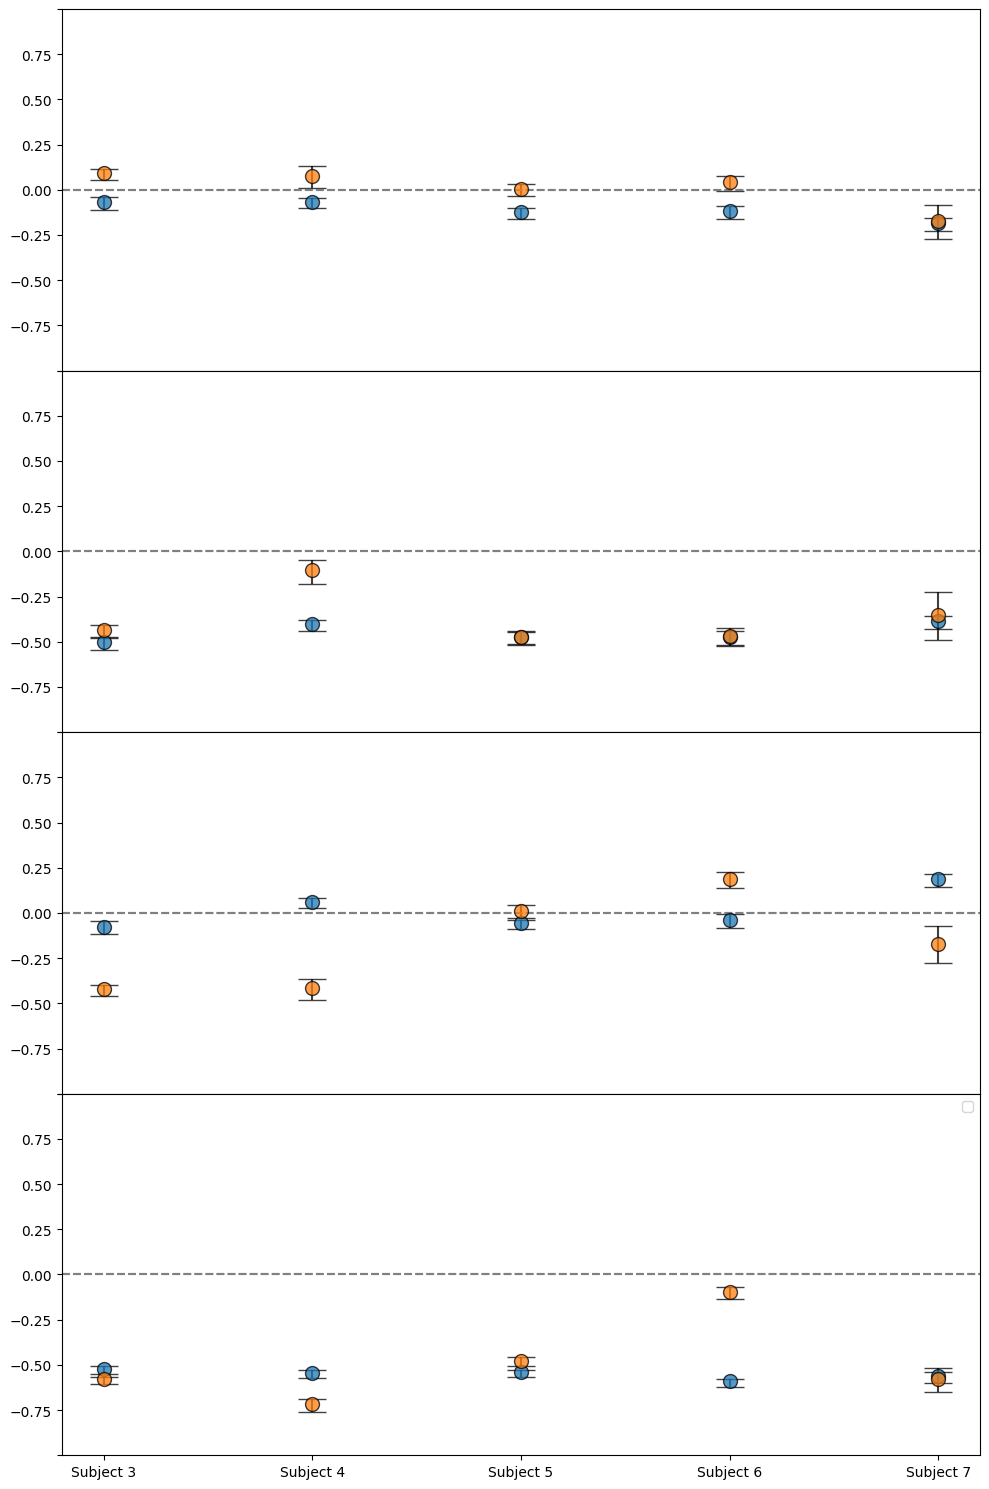

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd

# Plotting the selection bias according to the input dataset
def plot_selection(dataset:str,
                   grouped_by:list = None):
    """
    dataset : str -> Path of the source dataset (output of the 'selection_pressure.R' script).
    grouped_by : list -> Found in the config.json, according to which metadata to order the plot.
    """

    # Getting the metadata column names from the config, if there was no user input.
    if grouped_by is None:
        try:
            metadata_list = read_json()["metadata_list"].split(",")
        except:
            metadata_list = read_json()["metadata_list"]

    grouped_by2 = metadata_list[1]

    # Importing the dataset
    dataset = pd.read_csv(dataset, index_col=0)
    dataset.subject_id = dataset.subject_id.apply(lambda X : f"Subject {X.split("_")[-1]}")

    # Defining Borders of the baseline points
    dataset.baseline_ci_upper = (dataset.baseline_sigma - dataset.baseline_ci_upper).apply(abs)
    dataset.baseline_ci_lower = (dataset.baseline_sigma - dataset.baseline_ci_lower).apply(abs)

    # Getting unique values for region and subjects
    regions = dataset.region.unique()
    subjects = dataset.subject_id.unique()

    # Creating figure object
    fig = plt.figure(figsize = (2*len(subjects), 3*len(regions)))
    gs = fig.add_gridspec(len(regions)-1, hspace=0)
    axs = gs.subplots(sharex=True, sharey=True)
    colors = list(mcolors.TABLEAU_COLORS)

    # Itirating over the different conditions and plotting the results
    for region in range(1, len(regions[1:])+1):       
        for target, cl in zip(dataset[grouped_by2].unique(), range(0, len(colors))):
            ax_index = region - 1
            print(region, regions[region], target, cl)
            # Getting dataset for specific region in specific ab_target (this case).
            cond_region = (dataset.region == regions[region])
            cond_target = (dataset[grouped_by2] == target)
            temp_dataset = dataset.loc[(cond_region & cond_target), metadata_list + list(dataset.columns[-4:])]

            # Plottig each sub-dataset
            axs[ax_index].errorbar(x=temp_dataset["subject_id"],
                                   y=temp_dataset["baseline_sigma"],
                                   yerr=temp_dataset[["baseline_ci_lower","baseline_ci_upper"]].T.values,
                                   linestyle="",
                                   marker= "o",
                                   color=colors[cl],
                                   markersize=10,
                                   markeredgecolor="black",
                                   alpha=0.75,
                                   ecolor="black",
                                   capsize=10)
            
            # Modifing the plot parameters
            axs[ax_index].axhline(y=0, ls="--", color="grey")
            axs[ax_index].set_ylim(-1,1)           
            #axs[ax_index].set_ticks(axs[ax_index].get_yticks()[1:-1])
            y_ticks = axs[ax_index].yaxis.get_major_ticks()
            y_ticks[0].label1.set_visible(False) ## set first x tick label invisible
            y_ticks[-1].label1.set_visible(False) ## set last x tick label invisible
            plt.tight_layout()

    return dataset

result = plot_selection(csv_files[0])

* Add legend
* Y, X axis Labels
* Bigger font
* Title